In [10]:
import pandas as pd
import sqlalchemy as sa

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")

with engine.connect() as conn:
   df_em_el = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\patient_em_el_los.sql").read(), con=conn.connection)

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\2860851505.py:4: SyntaxWarning: invalid escape sequence '\D'
  engine = sa.create_engine("mssql+pyodbc:///?odbc_connect= DRIVER={SQL Server};SERVER=mph-eprprddwh1\DWHPRD;Trusted_Connection=yes;")
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\2860851505.py:7: SyntaxWarning: invalid escape sequence '\D'
  df_em_el = pd.read_sql(open("S:\Data Science\sandboxes\Jawad\patient_LOS_project\patient_em_el_los.sql").read(), con=conn.connection)
C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\2860851505.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_em_el = pd.read_sql

In [11]:
len(df_em_el)

9437

In [26]:
df_em_el =df_em_el.rename(columns={'em_el_dc': 'admission_type'})

In [45]:
df_em_el.head(5)

,admission_datetime,weekend,time_of_day,month,Los,admission_type,DischargeDestination,WardAdmission,AdmissionMethod,SourceOfAdmission,EthnicCategory,AgeOnAdmission,StartSexofPatientsCode,PrimaryDiagnosisICD,Description,Chapter_Number,Chapter_Description,AllDiagnosis,IMD_Decile,Los_Bin
0,2020-01-03 09:25:31.997,0,Morning,1,0,EMERG,19,59,2B,51,A,59,1,I251,Atherosclerotic heart disease,9,Diseases of the circulatory system,"I251,I10X,E780",5.0,0-1
1,2020-01-03 15:35:10.653,0,Afternoon,1,5,EMERG,19,82,2D,19,A,82,1,I210,Acute transmural myocardial infarction of ante...,9,Diseases of the circulatory system,"I210,I251,R410,I519,E119,H919,I10X,E780,Z922",6.0,5-10
2,2020-01-03 17:12:53.537,0,Afternoon,1,3,EMERG,19,69,2D,19,A,69,1,I210,Acute transmural myocardial infarction of ante...,9,Diseases of the circulatory system,"I210,I251,I501,I083,I371,I10X,E780,F171",5.0,2-5
3,2020-01-06 16:25:00.000,1,Afternoon,1,23,EMERG,19,70,21,19,A,70,1,I495,Sick sinus syndrome,9,Diseases of the circulatory system,"I495,I480,R55X,I251,A081,C61X,I10X,J449,E780,Z...",5.0,20-30
4,2020-01-07 02:52:04.527,0,Midnight,1,3,EMERG,19,88,21,19,A,88,1,I500,Congestive heart failure,9,Diseases of the circulatory system,"I500,I482,I10X,Z864,Z922",5.0,2-5


In [12]:
df_em_el.isna().sum()

admission_datetime           0
weekend                      0
time_of_day                  0
month                        0
Los                          0
em_el_dc                     0
DischargeDestination         0
WardAdmission                0
AdmissionMethod              0
SourceOfAdmission            0
EthnicCategory            1066
AgeOnAdmission               0
StartSexofPatientsCode       1
PrimaryDiagnosisICD          0
Description                  0
Chapter_Number               0
Chapter_Description          0
AllDiagnosis                 0
IMD_Decile                   0
dtype: int64

<Axes: xlabel='Los', ylabel='Count'>

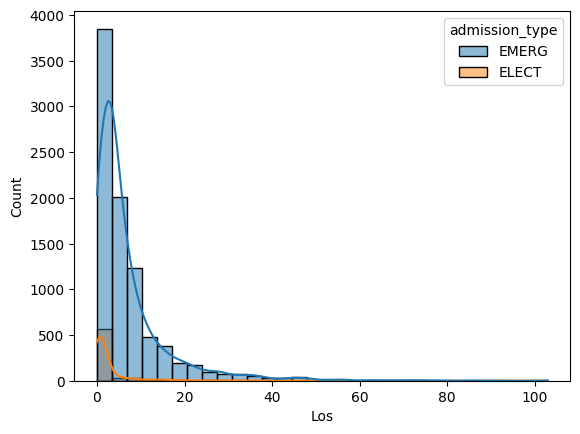

In [28]:
import seaborn as sns
sns.histplot(data=df_em_el, x='Los', hue='admission_type', bins=30, kde=True)


In [92]:
#Mapping codes

discharge_destination = {
    '19': 'Home',
    '29': 'Temp Residence',
    '30': 'Repatriation (Psych)',
    '37': 'Court',
    '38': 'Penal/Custody',
    '40': 'Prison', 
    '42': 'Police Custody',  
    '48': 'High Sec Psych (Scotland)',
    '49': 'NHS High Sec Psych',
    '50': 'NHS Medium Sec Unit',
    '51': 'NHS Gen Ward',
    '52': 'NHS Maternity/Neonatal',
    '53': 'NHS Mental Health',
    '54': 'NHS Care Home',
    '55': 'Care Home (Nursing)', 
    '56': 'Care Home (No Nursing)',
    '65': 'LA Care Accommodation',
    '66': 'Foster Care (LA)',
    '79': 'Deceased/Stillbirth',
    '84': 'Ind. Medium Sec Unit',
    '85': 'Non-NHS Care Home',
    '87': 'Ind. Hospital (Other)',
    '88': 'Hospice',
    '89': 'Forced Repatriation Org',
    '98': 'Not Discharged (Ongoing Spell)',
    '99': 'Unknown'
}


source_admission = {
    '19': "Home",
    '29': "Temporary residence",
    '39': "Prison, court, or police custody",
    '49': "NHS high-security psychiatric unit",
    '51': "NHS general/physically disabled ward or A&E",
    '52': "NHS maternity or neonatal ward",
    '53': "NHS mental health or learning disability ward",
    '54': "NHS care home",
    '65': "Local Authority residential care",
    '66': "Local Authority foster care",
    '79': "Born in transit or hospital",
    '85': "Non-NHS care home",
    '87': "Non-NHS hospital",
    '88': "Non-NHS hospice",
    '98': "Not applicable",
    '99': "Admission source unknown"
}

admission_labels = {
    '11': 'Elective – Waiting List',
    '12': 'Elective – Booked',
    '13': 'Elective – Planned',
    '21': 'Emergency – A&E (Same Provider)',
    '22': 'Emergency – GP Direct',
    '23': 'Emergency – Bed Bureau',
    '24': 'Emergency – Consultant Clinic',
    '25': 'Emergency – Mental Health Team',
    '2A': 'Emergency – A&E (Other Provider)',
    '2B': 'Emergency – Emergency Transfer',
    '2C': 'Emergency – Home Birth (Intended)',
    '2D': 'Emergency – Other',
    '28': 'Emergency – Other/Transfer/Home Birth',
    '31': 'Maternity – Antepartum',
    '32': 'Maternity – Postpartum',
    '81': 'Other – Non-Emergency Transfer',
    '82': 'Other – Birth in Provider',
    '83': 'Other – Birth Outside Provider'
}

ethnicity_labels = {
    'A': 'White - British',
    'B': 'White - Irish',
    'C': 'other White',
    'D': 'W & B Caribbean',
    'E': 'W & B African',
    'F': 'White and Asian',
    'G': 'Other mixed background',
    'H': 'Asian or Asian British - Indian',
    'J': 'Asian or Asian British - Pakistani',
    'K': 'Asian or Asian British - Bangladeshi',
    'L': 'other Asian background',
    'M': 'Black or Black British - Caribbean',
    'N': 'Black or Black British - African',
    'P': 'Other Black background',
    'R': 'Other Ethnic Groups - Chinese',
    'S': 'Other Ethnic Groups',
    'Z': 'Not stated'
}

weekend = {
    '0' : 'WeekDay',
    '1' : 'Weekend'
}


In [93]:
import plotly.graph_objects as go

monthly_avg_em_el = df_em_el.groupby(['month', 'admission_type'])['Los'].mean().reset_index()

methods = monthly_avg_em_el['admission_type'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_em_el[monthly_avg_em_el['admission_type'] == method]['month'],
        y=monthly_avg_em_el[monthly_avg_em_el['admission_type'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Emergency vs Elective Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Admission Type',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [1]:
bins = [*range(0, 45, 5)]
df_em_el.query("month" == 5)['Los'].plot.hist(alpha=0.5, bins=bins)

NameError: name 'df_em_el' is not defined

In [ ]:
monthly_avg_sourceAdmission = df_em_el.groupby(['month', 'SourceOfAdmission'])['Los'].mean().reset_index()
monthly_avg_dischargeDestination = df_em_el.groupby(['month', 'DischargeDestination'])['Los'].mean().reset_index()
monthly_avg_weekend = df_em_el.groupby(['month', 'weekend'])['Los'].mean().reset_index()
#monthly_avg_wardAdmission = df.groupby(['month', 'wardAdmission'])['Los'].mean().reset_index()


In [37]:
# Define bins and labels
bins = [0, 1, 2, 5, 10, 20, 30, 40, 60, 80, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-60', '60-80', '>80']

# Apply binning
df_em_el['Los_Bin'] = pd.cut(df_em_el['Los'], bins=bins, labels=labels, right=False)
# Group and count
bin_counts = df_em_el.groupby(['admission_type', 'Los_Bin']).size().reset_index(name='Count')
import plotly.express as px

fig = px.bar(
    bin_counts,
    x='Los_Bin',
    y='Count',
    color='admission_type',
    barmode='group',  # Use 'overlay' for transparency or 'group' for side-by-side
    labels={'Los_Bin': 'Length of Stay (Days)', 'Count': 'Number of Patients'},
    title='LoS Distribution by Admission Type'
)

fig.show()


C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\1055169809.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\1994922488.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



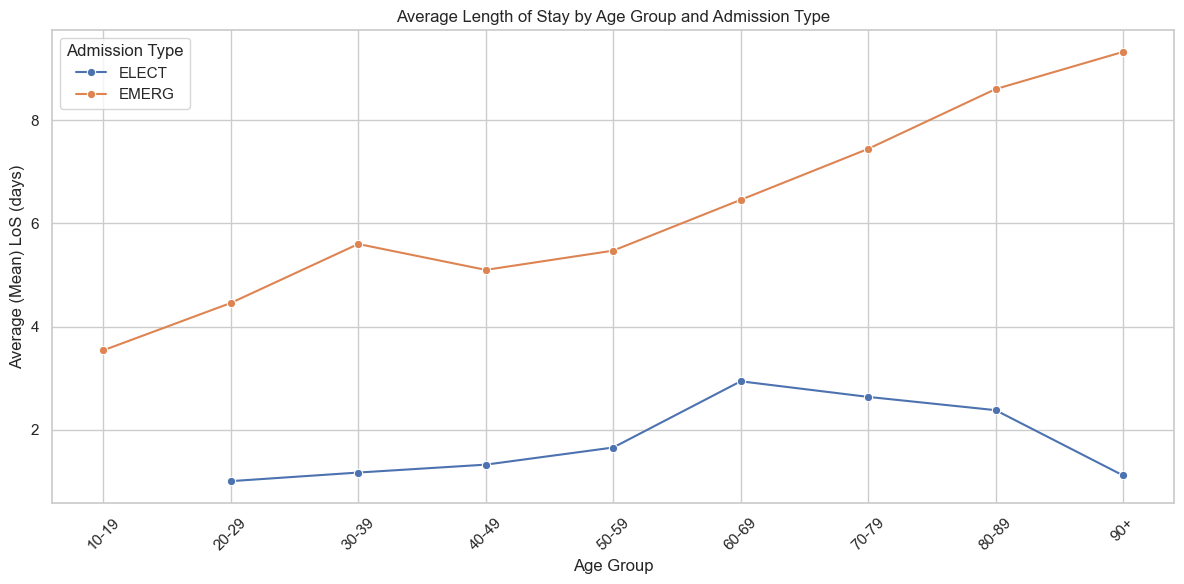

In [53]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90+']
df_em_el['age_group'] = pd.cut(df_em_el['AgeOnAdmission'], bins=bins, labels=labels, right=False)

los_by_age = df_em_el.groupby(['admission_type', 'age_group'])['Los'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=los_by_age, x='age_group', y='Los', hue='admission_type', marker='o')
plt.title('Average Length of Stay by Age Group and Admission Type')
plt.xlabel('Age Group')
plt.ylabel('Average (Mean) LoS (days)')
plt.xticks(rotation=45)
plt.legend(title='Admission Type')
plt.tight_layout()
plt.show()


C:\Users\jawad.iqbal\AppData\Local\Temp\ipykernel_8488\739518826.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



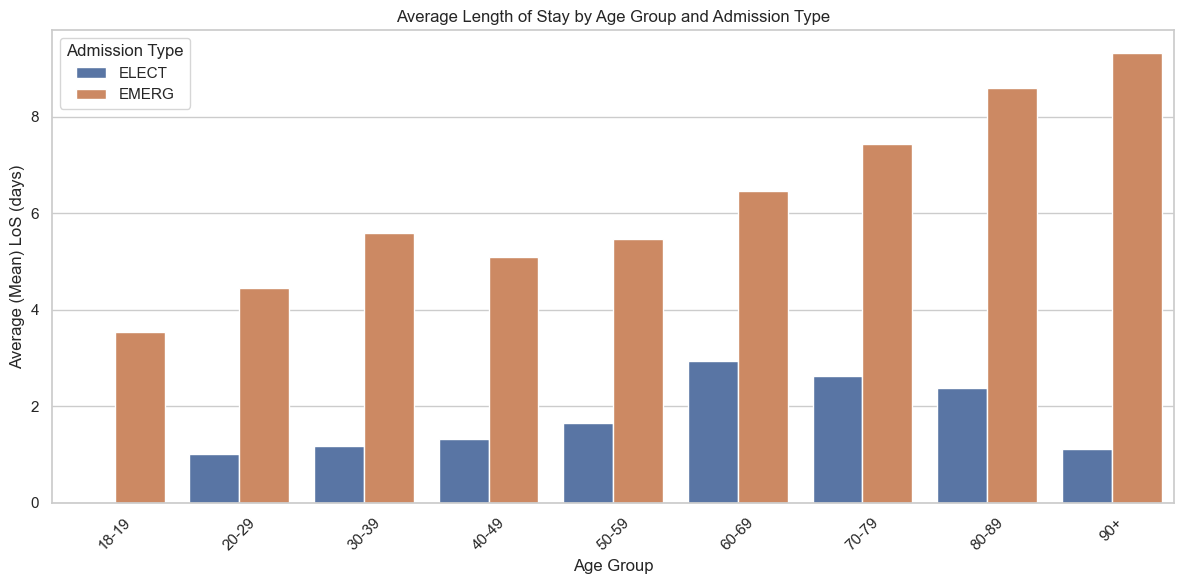

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels
bins = [17, 20, 30, 40, 50, 60, 70, 80, 90, 120]
labels = ['18-19', '20-29', '30-39', '40-49',
          '50-59', '60-69', '70-79', '80-89', '90+']

# Create age groups
df_em_el['age_group'] = pd.cut(df_em_el['AgeOnAdmission'], bins=bins, labels=labels, right=False)

# Group by admission type and age group, then calculate mean LoS
los_by_age = df_em_el.groupby(['admission_type', 'age_group'])['Los'].mean().reset_index()

# Plot as bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=los_by_age, x='age_group', y='Los', hue='admission_type')
plt.title('Average Length of Stay by Age Group and Admission Type')
plt.xlabel('Age Group')
plt.ylabel('Average (Mean) LoS (days)')
plt.xticks(rotation=45)
plt.legend(title='Admission Type')
plt.tight_layout()
plt.show()


In [112]:
df_em_el['AgeOnAdmission'].min()

18

<Axes: ylabel='Frequency'>

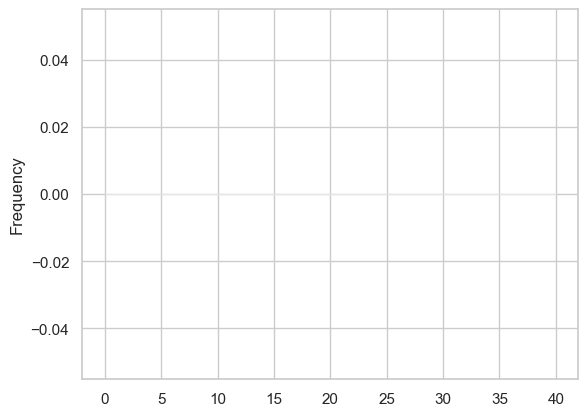

In [106]:
bins = [*range(0, 45, 5)]
df_em_el.query("month == '2024-11' & admission_type == 'EMERG'")['Los'].plot.hist(alpha=0.5, bins=bins)
#df.query("month == '2024-12' & em_el_dc == 'EMERG'")['Los'].plot.hist(alpha=0.5, bins=bins)
#df.query("month == '2024-06' & em_el_dc == 'ELECT'")['Los'].plot.hist(alpha=0.5, bins=bins)



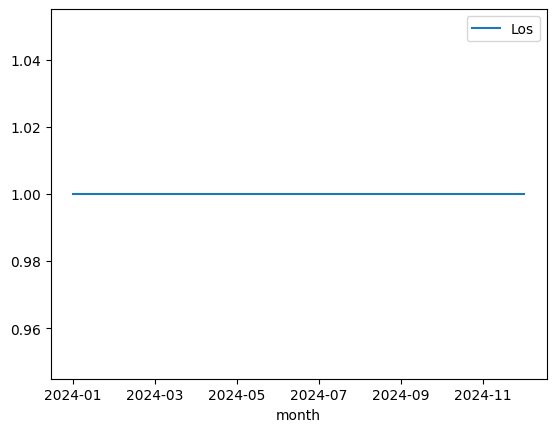

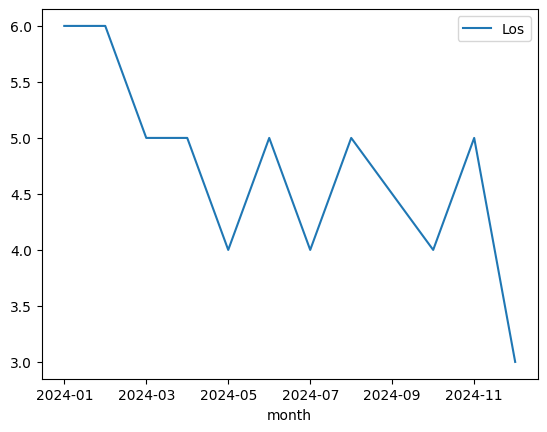

In [246]:
#df.groupby(['em_el_dc','month'])['Los'].median().to_frame()
for urg_month, urg_df in df.groupby(['em_el_dc'])[['Los', 'month']]:
    urg_df.groupby('month').median().plot()



In [99]:
import plotly.graph_objects as go

monthly_avg_timeOfDay = df_em_el.groupby(['month', 'time_of_day'])['Los'].mean().reset_index()

methods = monthly_avg_timeOfDay['time_of_day'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_timeOfDay[monthly_avg_timeOfDay['time_of_day'] == method]['month'],
        y=monthly_avg_timeOfDay[monthly_avg_timeOfDay['time_of_day'] == method]['Los'],
        mode='lines+markers',
        name=str(method),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Time of the Day Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Time of Day',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()


In [101]:
import plotly.graph_objects as go

methods = monthly_avg_sourceAdmission['SourceOfAdmission'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_sourceAdmission[monthly_avg_sourceAdmission['SourceOfAdmission'] == method]['month'],
        y=monthly_avg_sourceAdmission[monthly_avg_sourceAdmission['SourceOfAdmission'] == method]['Los'],
        mode='lines+markers',
        name=str(str(method) + " : " + source_admission[str(method)]),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by Source Of Admission Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Source Of Admission',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()

In [100]:
import plotly.graph_objects as go

methods = monthly_avg_dischargeDestination['DischargeDestination'].unique()

# Create a trace for each method
traces = [
    go.Scatter(
        x=monthly_avg_dischargeDestination[monthly_avg_dischargeDestination['DischargeDestination'] == method]['month'],
        y=monthly_avg_dischargeDestination[monthly_avg_dischargeDestination['DischargeDestination'] == method]['Los'],
        mode='lines+markers',
        name=str(str(method) + " : " + discharge_destination[str(method)]),
        line=go.scatter.Line(shape='spline')
    )
    for method in methods
]

# Assemble the figure
fig = go.Figure(data=traces)
fig.update_layout(
    title='Average LOS by DischargeDestination Per Month',
    xaxis_title='Month',
    yaxis_title='Length of Stay (Days)',
    template='plotly_white',
    legend_title='Discharge Destination',
    margin=dict(l=40, r=20, t=40, b=40)
)

fig.show()

In [97]:
import plotly.express as px
import pandas as pd

# Define the bin edges and labels
bins = [0, 1, 2, 5, 10, 20, 30, 40, 60, 80, float('inf')]
labels = ['0-1', '1-2', '2-5', '5-10', '10-20', '20-30', '30-40', '40-60', '60-80', '>80']

# Create a new column with the binned categories
df_em_el['Los_Bin'] = pd.cut(df_em_el['Los'], bins=bins, labels=labels, right=False)

# Count number of patients in each bin
bin_counts = df_em_el['Los_Bin'].value_counts().sort_index()

# Create a Plotly bar chart
fig1 = px.bar(
    x=bin_counts.index,
    y=bin_counts.values,
    labels={'x': 'Length of Stay (Days)', 'y': 'Number of Patients'},
    title='Distribution of Length of Stay (LoS) Bins'
)

# Show the chart
fig1.show()


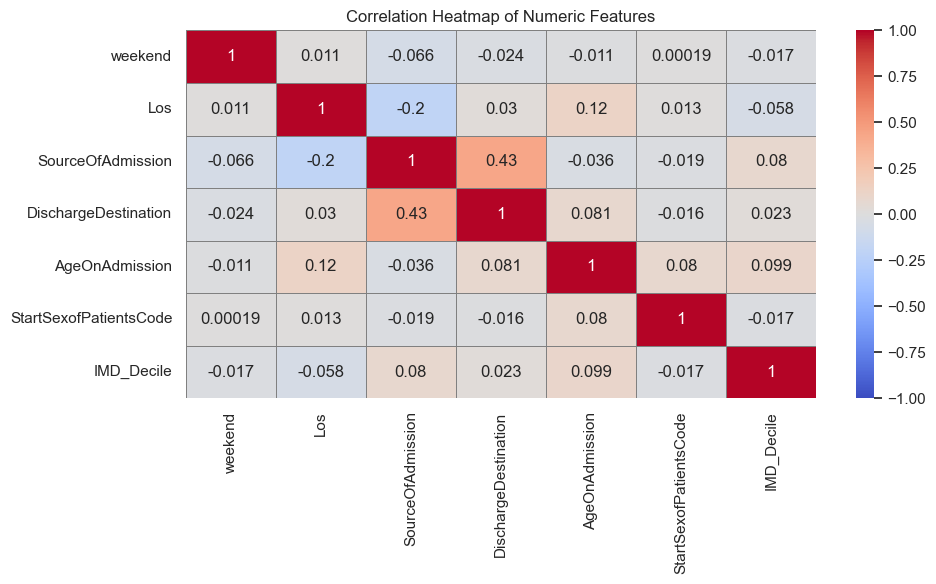

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
numeric_features = [
    'weekend', 'Los', 'SourceOfAdmission', 'DischargeDestination',
    'AgeOnAdmission', 'StartSexofPatientsCode', 'IMD_Decile'
]

# Compute correlation matrix
correlation_matrix = df_em_el[numeric_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


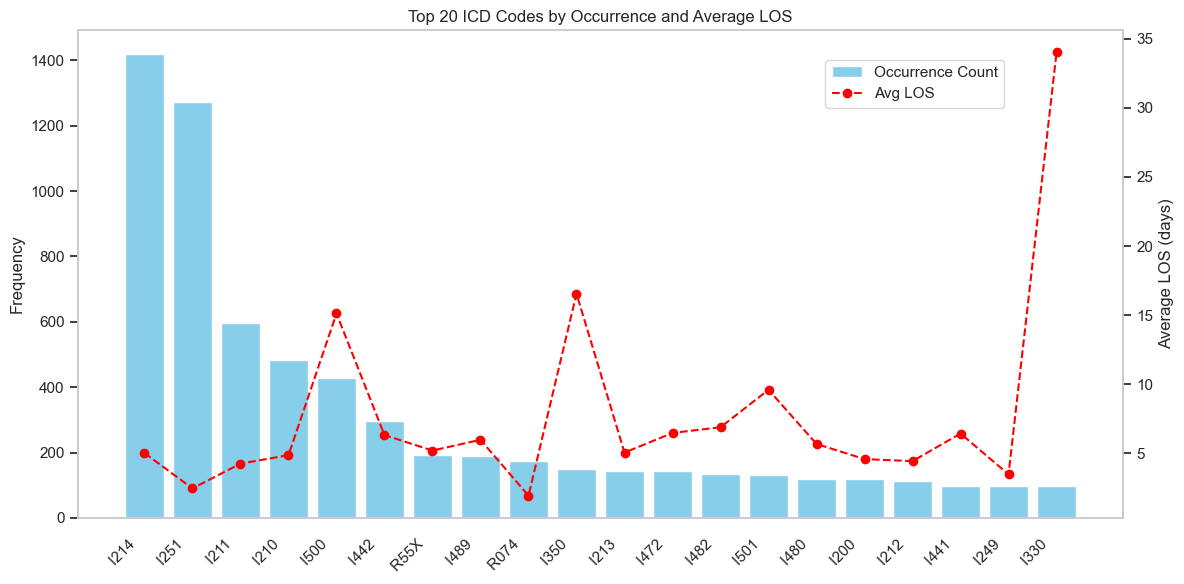

In [89]:
import matplotlib.pyplot as plt

icd_stats = (df_em_el.groupby('PrimaryDiagnosisICD')
      .agg(Count=('PrimaryDiagnosisICD', 'count'), Avg_LOS=('Los', 'mean'))
      .sort_values(by='Count', ascending=False)
      .head(20)
      .reset_index()
)


fig, ax1 = plt.subplots(figsize=(12, 6))

x = range(len(icd_stats))  # Numeric x-axis for clean spacing

# Bar plot for occurrence count
ax1.bar(x, icd_stats['Count'], color='skyblue', label='Occurrence Count')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(icd_stats['PrimaryDiagnosisICD'], rotation=45, ha='right')
ax1.set_title('Top 20 ICD Codes by Occurrence and Average LOS')

# Line plot for average LOS
ax2 = ax1.twinx()
ax2.plot(x, icd_stats['Avg_LOS'], color='red', marker='o', linestyle='--', label='Avg LOS')
ax2.set_ylabel('Average LOS (days)')
ax2.tick_params(axis='y')

#background
ax1.grid(False)
ax2.grid(False)

# Optional: Add legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

plt.tight_layout()
plt.show()
